In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import gaussian_kde
import ast


dataset=pd.read_csv('../Data/all_combined.csv')
#import dataset in format
# Subject, chooce ,receivor, Wait2.RT, targettxt ,gender ,age ,As ,Ao
# subID,list, list ,list ,list, bool ,float ,float ,float

#load the generated data from the MCMC test
data=[np.load(f'../MCMC_tests/samples_{i}.npz') for i in range(len(dataset))]



In [3]:
sub_to_index={}
for index in range( len(dataset)):
    sub=dataset['Subject'][index]
    sub_to_index[sub]=index

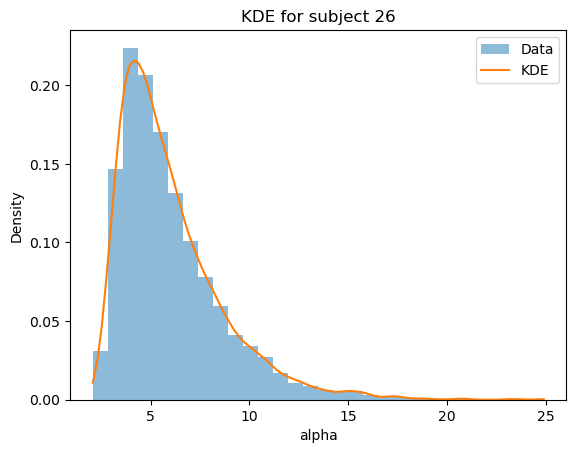

In [4]:
def kdp(data,subject):

    # Generate some random data
    #data = np.random.randn(1000)

    # Create the kernel density estimator
    kde = gaussian_kde(data)

    # Define the range of values to evaluate the KDE
    x_vals = np.linspace(data.min(), data.max(), 100)

    # Evaluate the KDE at the given values
    kde_vals = kde(x_vals)
    # Plot the original data and the KDE
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
    plt.plot(x_vals, kde_vals, label='KDE')
    plt.xlabel('alpha')
    plt.ylabel('Density')
    plt.title(f'KDE for subject {subject}')
    plt.legend()
    plt.show()




index=7
kdp(data[index]['alpha'],dataset['Subject'][index])

In [7]:
#finde KDE for all subjects
all_kde=[]
all_kde_max=[]
all_x_val=[]
for i in data:
    
     # Generate some random data
    datapoint=i['alpha']
    # Create the kernel density estimator
    kde = gaussian_kde(datapoint)
    
    # Define the range of values to evaluate the KDE
    x_vals = np.linspace(datapoint.min(), datapoint.max(), 100)
    all_x_val.append(x_vals)
    # Evaluate the KDE at the given values
    kde_vals = kde(x_vals)

    all_kde_max.append(x_vals[np.argmax(kde_vals)])
    all_kde.append(kde_vals)



In [8]:
#plots all subjects KDE in individual plots
def plorsolo(all_kde,all_x_val):
    for x_vals,kde_vals in zip(all_kde,all_x_val):
        #Plot the original data and the KDE
        #plt.hist(data, bins=30, density=True, alpha=0.5, label='Data')
        plt.plot(x_vals, kde_vals, label='KDE')
        plt.xlabel('alpha')
        plt.ylabel('Density')
        plt.legend()
        plt.show()


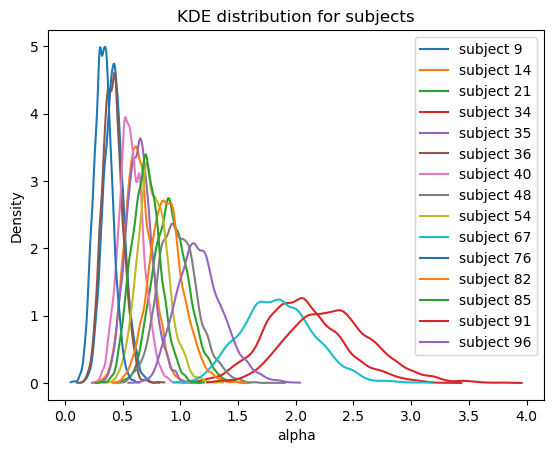

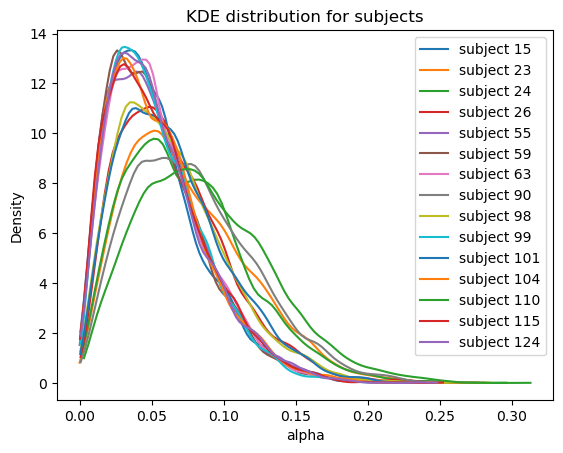

In [11]:
#plot KDE on same plot
# n is the number of KDE on one plot
# x is the max the density val can be on that plot
# y is the min the density can be on that plot
def one_plot(all_kde,all_x_val,n,x,y):
    i=0
    j=0
    while i < n:
        kde_vals=all_kde[j]
        x_vals=all_x_val[j]
        j+=1
        if max(kde_vals) < x and max(kde_vals) > y:
            
            plt.plot(x_vals, kde_vals, label=f'subject {dataset["Subject"][j]}')
            plt.xlabel('alpha')
            plt.ylabel('Density')
            i+=1
        
    plt.title('KDE distribution for subjects')
    plt.legend()
    plt.show()

one_plot(all_kde,all_x_val,15,5 ,1)

one_plot(all_kde,all_x_val,15,14 ,6)

In [6]:

def P(u):
        return 1/(1+np.exp(-u))
    

    #utility function
def Fehr_Schmidt(alpha,responder):
    proposer=10-responder
    u = responder - alpha * (proposer - responder)
    return u



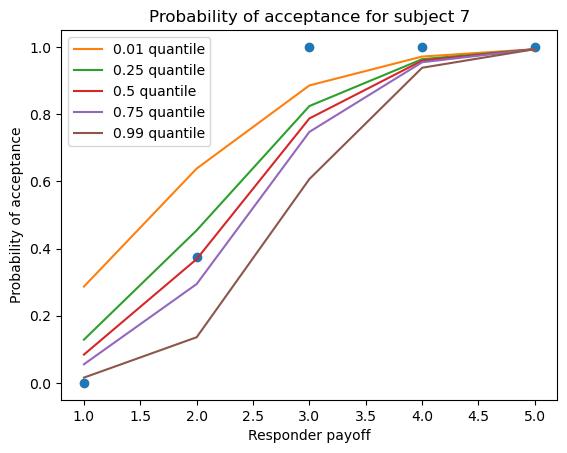

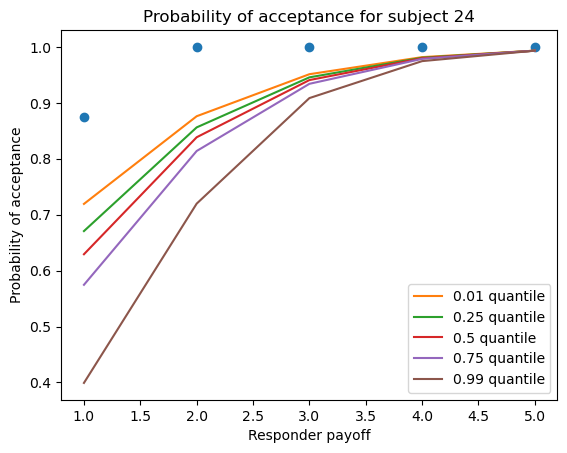

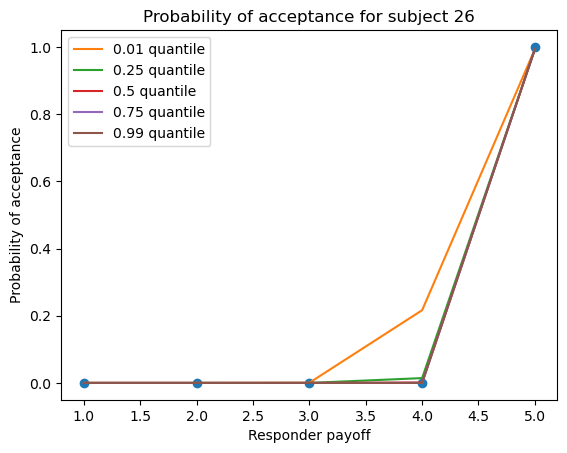

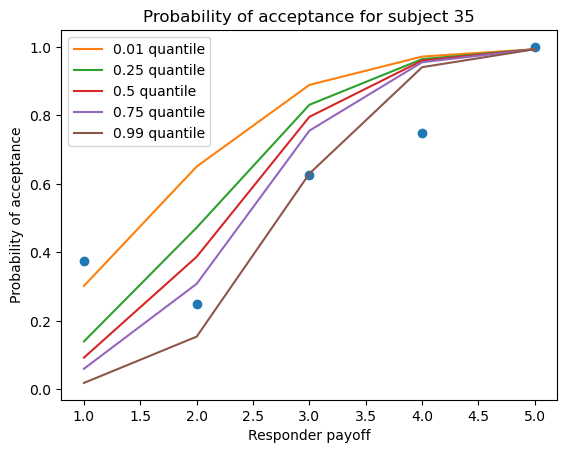

In [39]:
#compare with real data
person=range(0,40)
person=[sub_to_index[7],sub_to_index[24],sub_to_index[26],sub_to_index[35]]
for i in person:
    index=i
    qs=[np.quantile(data[index]['alpha'],i) for i in [0.01,0.25,0.5,0.75,0.99]]


    listt=[0]*5
    rs=ast.literal_eval(dataset['receivor'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['receivor'][index])[40:]
    co=ast.literal_eval(dataset['choose'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['choose'][index])[40:]

    for r,test in zip(np.array(rs),np.array(co)):
        if test == 1:
            Rece=r
            listt[int(Rece)-1]+=1/8
    plt.plot([1,2,3,4,5],listt,'o')

    for alpah,q in zip(qs,[0.01,0.25,0.5,0.75,0.99]):
        us=[Fehr_Schmidt(alpah,r) for r in range(1,6)]
        ps=[P(u) for u in us]
        plt.plot([1,2,3,4,5], ps, label=f'{q} quantile')
        
    plt.xlabel('Responder payoff')
    plt.ylabel('Probability of acceptance')
    plt.title(f"Probability of acceptance for subject {dataset['Subject'][index]}")
    plt.legend()
    plt.show()



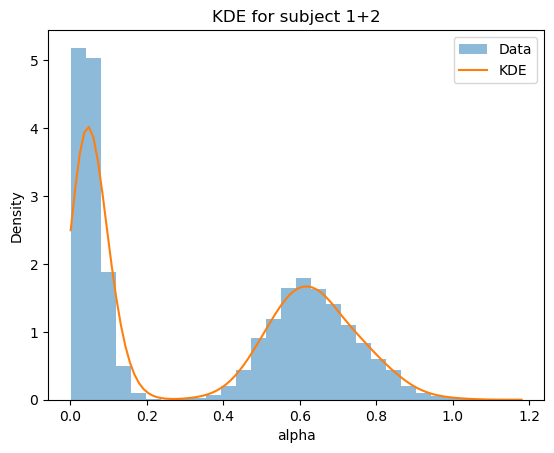

In [13]:
#ADD kdeS
def add_data(d1,d2):
    return np.concatenate((d1, d2))

d=add_data(data[1]['alpha'],data[2]['alpha'])

kdp(d,'1+2')

In [14]:
#devide data into age groups

d=[]
d1=[]
d2=[]
d3=[]
d4=[]
a1=[]
a2=[]
a3=[]
a4=[]
for i,(j,k) in enumerate(zip(data,all_kde_max)):
    d=add_data(d,j['alpha'])
    age=dataset['age'][i]
    if age < 8:
        d1=add_data(d1,j['alpha'])
        a1.append(k)
    elif age < 10:
        d2=add_data(d2,j['alpha'])
        a2.append(k)
    elif age < 12:
        d3=add_data(d3,j['alpha'])
        a3.append(k)
    else:
        d4=add_data(d4,j['alpha'])
        a4.append(k)



In [17]:
print(f'age group 1 have {len(a1)} subjects')
print(f'age group 2 have {len(a2)} subjects')
print(f'age group 3 have {len(a3)} subjects')
print(f'age group 4 have {len(a4)} subjects')

age group 1 have 22 subjects
age group 2 have 38 subjects
age group 3 have 47 subjects
age group 4 have 32 subjects


In [37]:
def plot_distrabustion(datas,title,label=None,pin=5000,xlim=None):
        plt.title(title)
        for j,i in enumerate(datas):
                l=None if label==None else label[j]
                plt.hist(i, histtype='stepfilled', bins=pin, alpha=0.5, density=True, label=l);
        if xlim:
                plt.xlim(0, xlim)
        plt.ylabel('Probability Density')
        plt.xlabel('alpha')
        if label:
                plt.legend()
        plt.show()

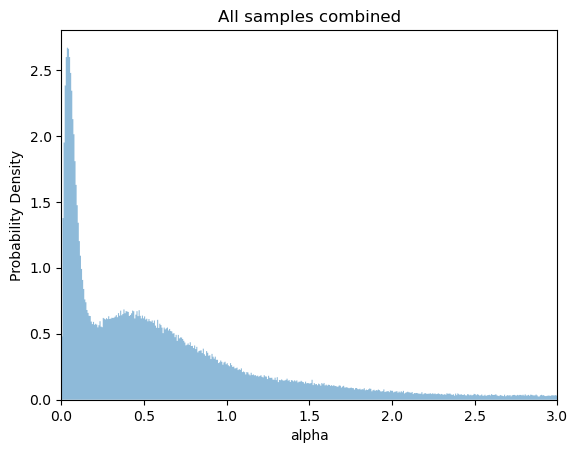

In [28]:
plot_distrabustion([d],'All samples combined')

In [31]:
label=['age under 8', 'age between 8 and 10', 'age between 10 and 12','age over 12']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


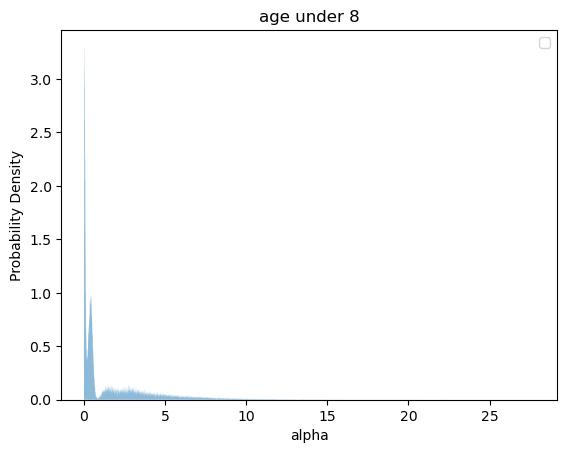

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


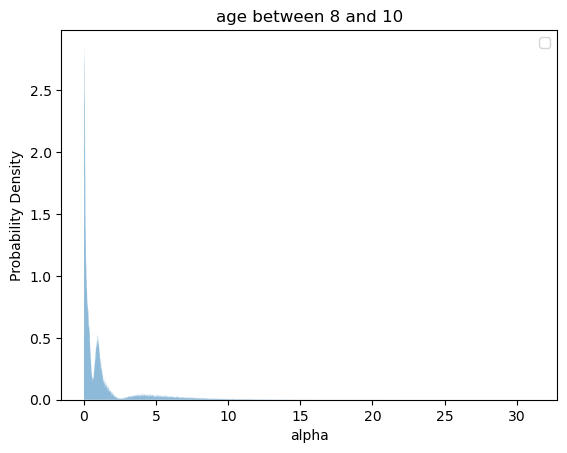

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


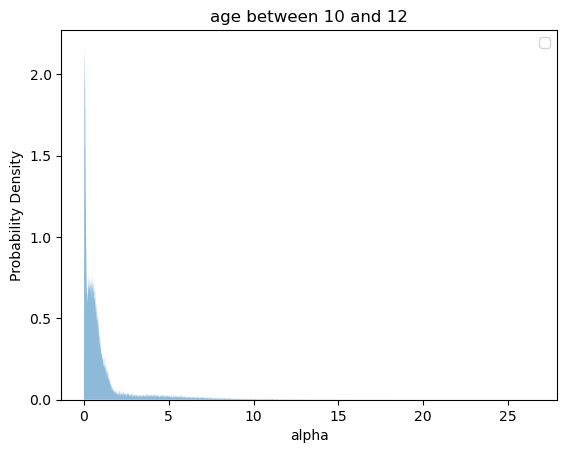

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


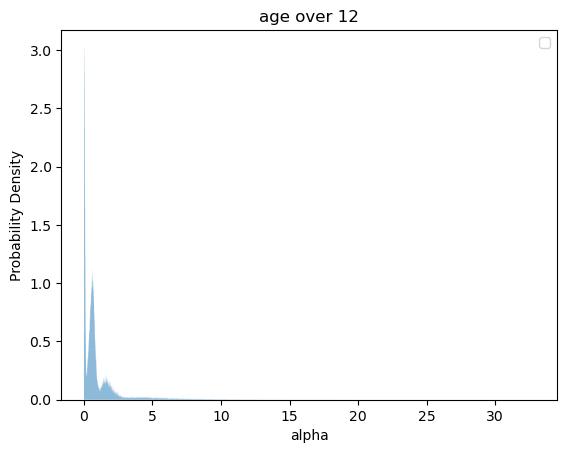

In [18]:
for ds,titel in zip([d1,d2,d3,d4],label):
    plot_distrabustion([ds],titel)

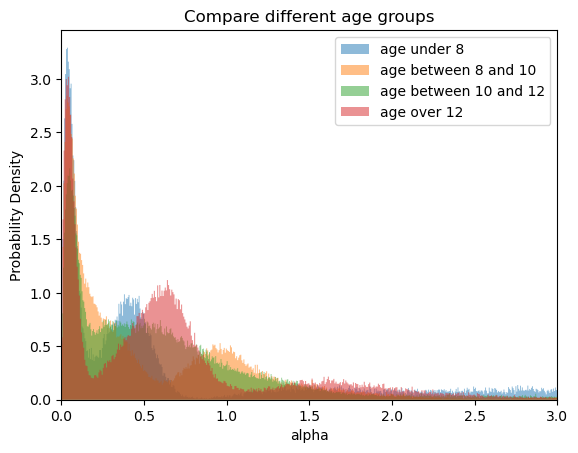

In [29]:
plot_distrabustion([d1,d2,d3,d4],'Compare different age groups',label=['age under 8', 'age between 8 and 10', 'age between 10 and 12','age over 12'])

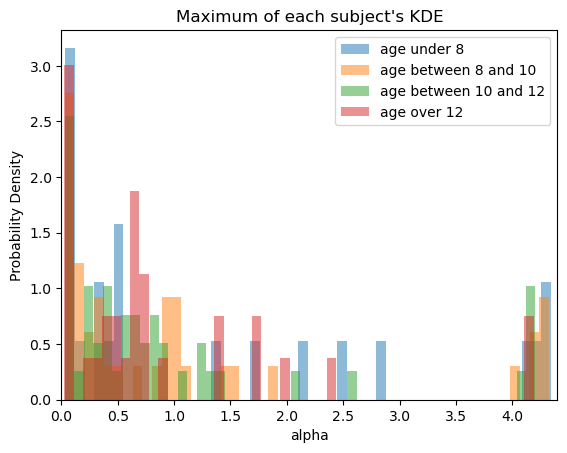

In [38]:
plot_distrabustion([a1,a2,a3,a4],'Maximum of each subject\'s KDE',pin=50,label=label,xlim=4.4)

In [18]:
label=['age under 8', 'age between 8 and 10', 'age between 10 and 12','age over 12']

#prints mean alpha for each age group
print('mean for KDE max')
print(np.mean(a1))
print(np.mean(a2))
print(np.mean(a3))
print(np.mean(a4))

print('mean for MCMC samples')
print(np.mean(d1))
print(np.mean(d2))
print(np.mean(d3))
print(np.mean(d4))

mean for KDE max
1.3856409887895191
1.1041915398539175
0.97141415144124
0.8911069030531897
mean for MCMC samples
1.8203718869210184
1.3964419375535337
1.1775048234592558
1.085140203092696


In [22]:
# compare to true data
comlist_ture=[]
comlist_g=[]
for i in range(len(dataset)):
    index=i
    listt=[0]*5
    rs=ast.literal_eval(dataset['receivor'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['receivor'][index])[40:]
    co=ast.literal_eval(dataset['choose'][index])[0:40] if ast.literal_eval(dataset['receivor'][index])[0] >= 0 else ast.literal_eval(dataset['choose'][index])[40:]

    for r,test in zip(np.array(rs),np.array(co)):
        if test == 1:
            Rece=r
            listt[int(Rece)-1]+=1/8
    
    alpah=all_kde_max[index]
    us=[Fehr_Schmidt(alpah,r) for r in range(1,6)]
    ps=[P(u) for u in us]

    comlist_g.append(ps)
    comlist_ture.append(listt)


In [24]:
def mse(true,gues):
    mseval=0
    for t,g in zip(true,gues):
        mseval+=(t-g)**2
    return mseval

In [ ]:
#calculate MSE
mselist=[]
for t,g in zip(comlist_ture,comlist_g):
    mselist.append(mse(t,g))



In [26]:
#mselist is a list that contains the MSE for each subject (sub)
print(mselist[sub_to_index[7]])
print(mselist[sub_to_index[24]])
print(mselist[sub_to_index[26]])
print(mselist[sub_to_index[35]])
print(np.mean(mselist))

0.05405193729815037
0.0781317262300062
0.00022727642399643892
0.16622927991584638
0.14673651938663174
